In [125]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets

In [126]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s     

In [127]:
def relu(z):
    s=np.maximum(0,z)
    return s

In [143]:
def forward_propagation(X, parameters):
   
        
    # retrieve parameters
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]
    w3 = parameters["w3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(w1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(w3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, w1, b1, z2, a2, w2, b2, z3, a3, w3, b3)
    
    return a3, cache

In [129]:
def backward_propagation(X,Y,cache):
    m=X.shape[1]
    
    (z1,a1,w1,b1,z2,a2,w2,b2,z3,a3,w3,b3)=cache
    
    
    dz3 = 1./m * (a3 - Y)
    dw3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(w3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dw2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(w2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dw1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    
    gradients={
        
        "dz3":dz3,
        "dw3":dw3,
        "db3":db3,
        
        "da2":da2,
        "dz2":dz2,
        "dw2":dw2,
        "db2":db2,
        
        "d1":da1,
        "dz3":dz3,
        "dz1":dz1,
        "dw1":dw1,
        "db1":db1,
        
    }
    
    return gradients
    

In [130]:
def compute_loss(a3,Y):
    m=Y.shape[1]
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    loss = 1./m * np.nansum(logprobs)
    
    return loss

In [131]:
def update_parameters(parameters,grads,learning_rate):
    L=len(parameters)//2
    
    for i in range(L):
        parameters['w'+str(i+1)]=parameters["w"+str(i+1)] - learning_rate*grads['dw'+str(i+1)]
        parameters['b'+str(i+1)]=parameters['b'+str(i+1)] - learning_rate*grads['db'+str(i+1)]
      
    
    return parameters

In [132]:
def load_cat_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    train_set_x_orig = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
    test_set_x_orig = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
    
    train_set_x = train_set_x_orig/255
    test_set_x = test_set_x_orig/255

    return train_set_x, train_set_y, test_set_x, test_set_y, classes

In [133]:
train_set_x, train_set_y, test_set_x, test_set_y, classes=load_cat_dataset()

OSError: Unable to open file (unable to open file: name = 'datasets/train_catvnoncat.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [145]:
def predict(X, y, parameters):
    
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    # print results
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p

In [135]:
def plot_decision_boundary(model,X,Y):
    x_min,x_max=X[0,:].min() -1,X[0,:].max() +1
    y_min,y_max=X[1,:].min()-1,X[1,:].max() +1
    h=0.01
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    z=model(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    
    plt.contourf(xx,yy,z,cmap=plt.cm.spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    pplt.scatter(X[0,:],X[1,:],c=y,cmap=plt.cm.spectral)
    plt.show()

In [136]:
def predict_dec(arameters,X):
    a3,cache=forward_propagation(X,parameters)
    predictions=(a3>0.5)
    return predictions

In [137]:
def load_dataset():
    np.random.seed(1)
    
    train_X,train_Y=sklearn.datasets.make_circles(n_samples=300,noise=0.5)
    
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    return train_X, train_Y, test_X, test_Y

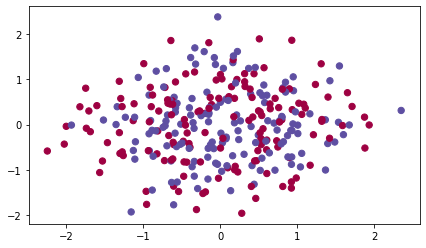

In [138]:

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

In [139]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
   
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [140]:
# GRADED FUNCTION: initialize_parameters_zeros 

def initialize_parameters_zeros(layers_dims):
   
    
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['w'+str(l)] = np.zeros((layers_dims[l], layers_dims[l - 1]))
        parameters['b'+str(l)] = np.zeros((layers_dims[l], 1))
        ### END CODE HERE ###
    return parameters

In [141]:
parameters = initialize_parameters_zeros([3,2,1])
print("w1 = " + str(parameters["w1"]))
print("b1 = " + str(parameters["b1"]))
print('w2 = '+str(parameters['w2']))
print('b2 = '+str(parameters['b2']))


w1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
w2 = [[0. 0.]]
b2 = [[0.]]


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


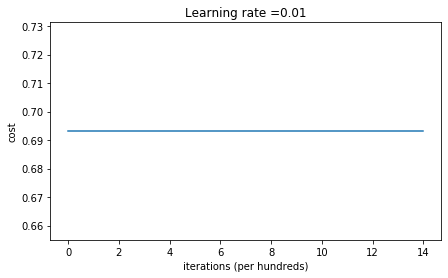

on the train set:
Accuracy: 0.5
 on the test set:
Accuracy: 0.5


In [146]:
parameters=model(train_X,train_Y,initialization='zeros')
print('on the train set:')
prediction_train=predict(train_X,train_Y,parameters)
print(' on the test set:')
prediction_test=predict(test_X,test_Y,parameters)

In [147]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

NameError: name 'predictions_train' is not defined

AttributeError: module 'matplotlib.cm' has no attribute 'spectral'

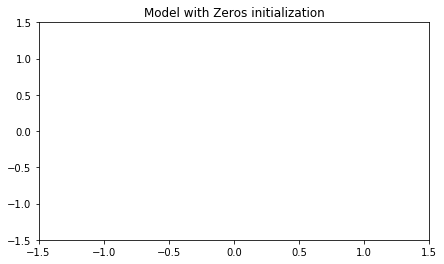

In [148]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [149]:
# GRADED FUNCTION: initialize_parameters_random

def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['w' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### END CODE HERE ###

    return parameters

In [150]:
parameters = initialize_parameters_random([3, 2, 1])
print("w1 = " + str(parameters["w1"]))
print("b1 = " + str(parameters["b1"]))
print("w2 = " + str(parameters["w2"]))
print("b2 = " + str(parameters["b2"]))

w1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
w2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Cost after iteration 0: inf
Cost after iteration 1000: 0.8410070068066587
Cost after iteration 2000: 0.918668842062726
Cost after iteration 3000: 0.7387919057114511
Cost after iteration 4000: 0.7025653566566272
Cost after iteration 5000: 0.6911481725623652
Cost after iteration 6000: 0.6854210034958507
Cost after iteration 7000: 0.6823023996140566
Cost after iteration 8000: 0.6801688760980621
Cost after iteration 9000: 0.6788347806003956
Cost after iteration 10000: 0.6780555095113346
Cost after iteration 11000: 0.6777385930160378
Cost after iteration 12000: 0.6775354183898428
Cost after iteration 13000: 0.6773544270897273
Cost after iteration 14000: 0.6770406687648084


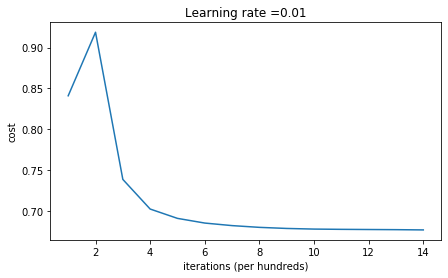

On the train set:
Accuracy: 0.5566666666666666
On the test set:
Accuracy: 0.5


In [151]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [152]:
print (predictions_train)
print (predictions_test)

[[1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
  1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
  1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
  0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
  1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1
  1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1
  1 1 1 1 1 0 1 1 1 1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


AttributeError: module 'matplotlib.cm' has no attribute 'spectral'

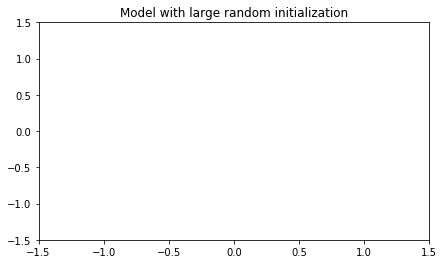

In [153]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [154]:
# GRADED FUNCTION: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['w' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### END CODE HERE ###
        
    return parameters

In [155]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["w1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["w2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0: 0.9187066909315034
Cost after iteration 1000: 0.6881071346512481
Cost after iteration 2000: 0.6840230482887701
Cost after iteration 3000: 0.6793240756331136
Cost after iteration 4000: 0.6742199450325567
Cost after iteration 5000: 0.6704187170463822
Cost after iteration 6000: 0.6678832714210555
Cost after iteration 7000: 0.6659313256047088
Cost after iteration 8000: 0.6643657146445017
Cost after iteration 9000: 0.6627667099482979
Cost after iteration 10000: 0.6613865543285721
Cost after iteration 11000: 0.6600612307258348
Cost after iteration 12000: 0.6587927771846606
Cost after iteration 13000: 0.6574975504431514
Cost after iteration 14000: 0.6560722037438201


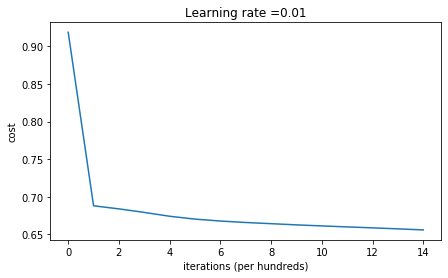

On the train set:
Accuracy: 0.58
On the test set:
Accuracy: 0.57


In [156]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

AttributeError: module 'matplotlib.cm' has no attribute 'spectral'

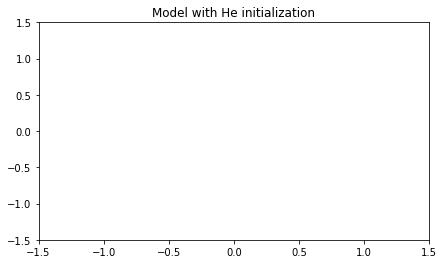

In [157]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)